<a href="https://colab.research.google.com/github/lohith1266/oasis-infobyte-intership-Data-Anallytics/blob/main/MCDonalds_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🍟 McDONALD'S MENU NUTRITIONAL DATA ANALYSIS 🍟
Dataset loaded successfully!
Dataset shape: (260, 24)

Column names:
['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                  

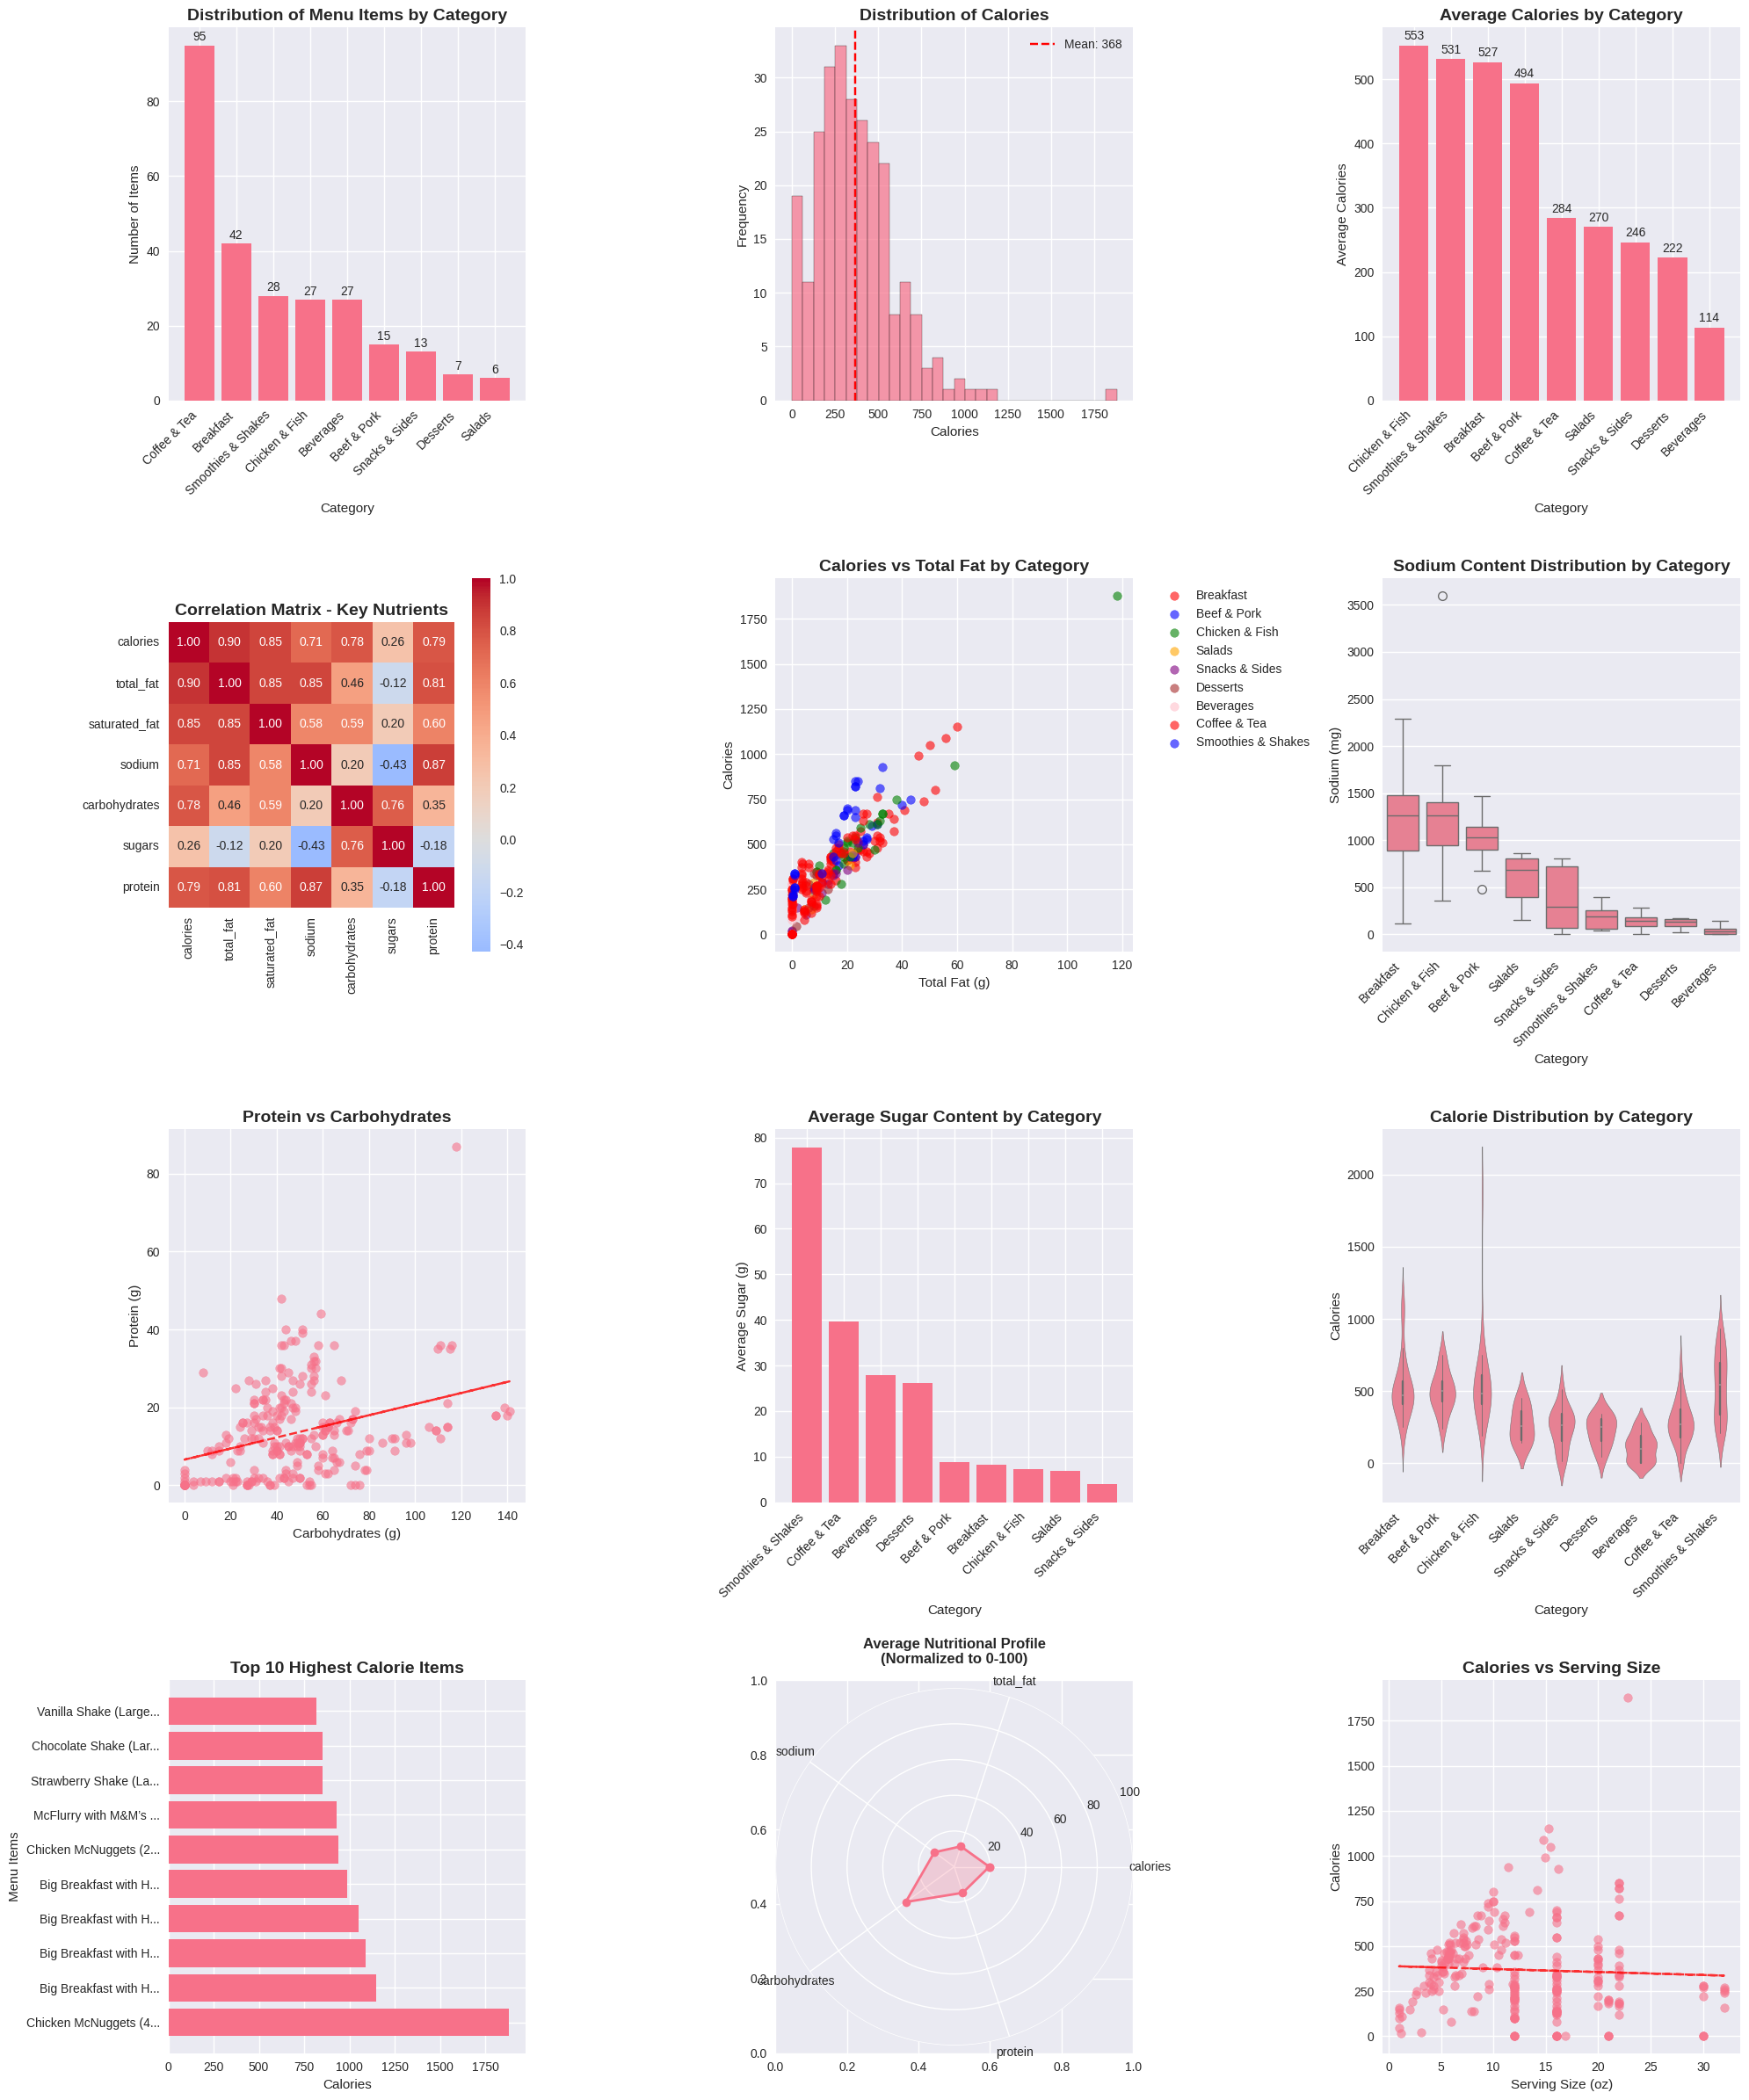

All visualizations created successfully!

KEY INSIGHTS AND BUSINESS RECOMMENDATIONS

🔍 KEY INSIGHTS:
----------------------------------------
1. CATEGORY ANALYSIS:
   • Highest average calories: Chicken & Fish (553 cal)
   • Lowest average calories: Beverages (114 cal)

2. CALORIC EXTREMES:
   • Highest calorie item: Chicken McNuggets (40 piece) (1880 cal)
   • Lowest calorie item: Diet Coke (Small) (0 cal)

3. SODIUM CONCERNS:
   • 55 out of 260 items (21.2%) exceed 1000mg sodium
   • Average sodium across all items: 496mg

4. SUGAR CONTENT:
   • 108 items contain more than 30g of sugar
   • Average sugar content: 29.4g

💡 BUSINESS RECOMMENDATIONS:
----------------------------------------
1. MENU OPTIMIZATION:
   • Consider expanding the lower-calorie categories like Beverages and Salads
   • Introduce more items in the 200-400 calorie range to cater to health-conscious customers
   • Review high-calorie items and consider portion size adjustments

2. HEALTH-CONSCIOUS OPTIONS:
   • De

In [ ]:
# McDonald's Menu Nutritional Data - Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ==========================================
# 1. DATA LOADING AND CLEANING
# ==========================================

def load_and_clean_data(file_path):
    """Load and clean the McDonald's menu dataset"""

    # Load the data
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print("\nColumn names:")
    print(df.columns.tolist())

    # Basic info about the dataset
    print("\n" + "="*50)
    print("DATASET OVERVIEW")
    print("="*50)
    df.info()

    # Check for missing values
    print("\n" + "="*50)
    print("MISSING VALUES CHECK")
    print("="*50)
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    if missing_values.sum() == 0:
        print("No missing values found!")

    # Clean column names (remove special characters and spaces)
    df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True)
    df.columns = df.columns.str.replace(' ', '_').str.lower()

    # Clean specific problematic characters in data
    for col in df.select_dtypes(include=['object']).columns:
        if col != 'serving_size':  # Don't clean serving size as it contains measurement units
            df[col] = df[col].astype(str).str.replace('â€™', "'").str.replace('Ã±', 'n')

    return df

# ==========================================
# 2. DESCRIPTIVE STATISTICS
# ==========================================

def calculate_descriptive_stats(df):
    """Calculate comprehensive descriptive statistics"""

    print("\n" + "="*50)
    print("DESCRIPTIVE STATISTICS")
    print("="*50)

    # Select numerical columns for analysis
    numerical_cols = ['calories', 'calories_from_fat', 'total_fat', 'saturated_fat',
                     'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber',
                     'sugars', 'protein']

    # Basic statistics
    desc_stats = df[numerical_cols].describe()
    print("Basic Statistical Measures:")
    print(desc_stats.round(2))

    # Additional statistics
    print("\n" + "-"*40)
    print("ADDITIONAL STATISTICAL MEASURES")
    print("-"*40)

    for col in numerical_cols:
        print(f"\n{col.upper()}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Mode: {df[col].mode().iloc[0] if not df[col].mode().empty else 'No mode'}")
        print(f"  Standard Deviation: {df[col].std():.2f}")
        print(f"  Variance: {df[col].var():.2f}")
        print(f"  Skewness: {stats.skew(df[col]):.2f}")
        print(f"  Kurtosis: {stats.kurtosis(df[col]):.2f}")

    return desc_stats

# ==========================================
# 3. CATEGORY ANALYSIS (Similar to Customer Analysis)
# ==========================================

def analyze_categories(df):
    """Analyze menu categories and their characteristics"""

    print("\n" + "="*50)
    print("CATEGORY ANALYSIS")
    print("="*50)

    # Category distribution
    category_counts = df['category'].value_counts()
    print("Items per Category:")
    print(category_counts)

    # Average nutritional values by category
    print("\n" + "-"*40)
    print("AVERAGE NUTRITIONAL VALUES BY CATEGORY")
    print("-"*40)

    numerical_cols = ['calories', 'total_fat', 'sodium', 'carbohydrates', 'protein']
    category_stats = df.groupby('category')[numerical_cols].mean().round(2)
    print(category_stats)

    # Find highest and lowest calorie items by category
    print("\n" + "-"*40)
    print("CALORIE EXTREMES BY CATEGORY")
    print("-"*40)

    for category in df['category'].unique():
        cat_data = df[df['category'] == category]
        highest_cal = cat_data.loc[cat_data['calories'].idxmax()]
        lowest_cal = cat_data.loc[cat_data['calories'].idxmin()]

        print(f"\n{category}:")
        print(f"  Highest Calorie: {highest_cal['item']} ({highest_cal['calories']} cal)")
        print(f"  Lowest Calorie: {lowest_cal['item']} ({lowest_cal['calories']} cal)")

    return category_stats

# ==========================================
# 4. CORRELATION ANALYSIS
# ==========================================

def correlation_analysis(df):
    """Perform correlation analysis between nutritional components"""

    print("\n" + "="*50)
    print("CORRELATION ANALYSIS")
    print("="*50)

    # Select numerical columns for correlation
    numerical_cols = ['calories', 'calories_from_fat', 'total_fat', 'saturated_fat',
                     'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber',
                     'sugars', 'protein']

    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()

    # Find strong correlations (> 0.7 or < -0.7)
    print("Strong Correlations (|r| > 0.7):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr.append({
                    'var1': correlation_matrix.columns[i],
                    'var2': correlation_matrix.columns[j],
                    'correlation': corr_val
                })

    for corr in strong_corr:
        print(f"  {corr['var1']} ↔ {corr['var2']}: {corr['correlation']:.3f}")

    return correlation_matrix

# ==========================================
# 5. DATA VISUALIZATION
# ==========================================

def create_visualizations(df, correlation_matrix, category_stats):
    """Create comprehensive visualizations for the EDA"""

    print("\n" + "="*50)
    print("CREATING VISUALIZATIONS")
    print("="*50)

    # Set up the plotting area
    fig = plt.figure(figsize=(20, 24))

    # 1. Category Distribution (Bar Chart)
    plt.subplot(4, 3, 1)
    category_counts = df['category'].value_counts()
    bars = plt.bar(range(len(category_counts)), category_counts.values)
    plt.title('Distribution of Menu Items by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Number of Items')
    plt.xticks(range(len(category_counts)), category_counts.index, rotation=45, ha='right')

    # Add value labels on bars
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                str(category_counts.values[i]), ha='center', va='bottom')

    # 2. Calorie Distribution (Histogram)
    plt.subplot(4, 3, 2)
    plt.hist(df['calories'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Distribution of Calories', fontsize=14, fontweight='bold')
    plt.xlabel('Calories')
    plt.ylabel('Frequency')
    plt.axvline(df['calories'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["calories"].mean():.0f}')
    plt.legend()

    # 3. Average Calories by Category (Bar Chart)
    plt.subplot(4, 3, 3)
    avg_calories = df.groupby('category')['calories'].mean().sort_values(ascending=False)
    bars = plt.bar(range(len(avg_calories)), avg_calories.values)
    plt.title('Average Calories by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Average Calories')
    plt.xticks(range(len(avg_calories)), avg_calories.index, rotation=45, ha='right')

    # Add value labels on bars
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'{avg_calories.values[i]:.0f}', ha='center', va='bottom')

    # 4. Correlation Heatmap
    plt.subplot(4, 3, 4)
    key_nutrients = ['calories', 'total_fat', 'saturated_fat', 'sodium',
                    'carbohydrates', 'sugars', 'protein']
    corr_subset = correlation_matrix.loc[key_nutrients, key_nutrients]
    sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Matrix - Key Nutrients', fontsize=14, fontweight='bold')

    # 5. Fat vs Calories Scatter Plot
    plt.subplot(4, 3, 5)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
    categories = df['category'].unique()
    for i, category in enumerate(categories):
        cat_data = df[df['category'] == category]
        plt.scatter(cat_data['total_fat'], cat_data['calories'],
                   alpha=0.6, label=category, color=colors[i % len(colors)])
    plt.title('Calories vs Total Fat by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Total Fat (g)')
    plt.ylabel('Calories')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 6. Sodium Content Box Plot
    plt.subplot(4, 3, 6)
    category_order = df.groupby('category')['sodium'].median().sort_values(ascending=False).index
    df_plot = df.set_index('category').loc[category_order].reset_index()
    sns.boxplot(data=df_plot, x='category', y='sodium')
    plt.title('Sodium Content Distribution by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Sodium (mg)')
    plt.xticks(rotation=45, ha='right')

    # 7. Protein vs Carbohydrates
    plt.subplot(4, 3, 7)
    plt.scatter(df['carbohydrates'], df['protein'], alpha=0.6)
    plt.title('Protein vs Carbohydrates', fontsize=14, fontweight='bold')
    plt.xlabel('Carbohydrates (g)')
    plt.ylabel('Protein (g)')

    # Add trend line
    z = np.polyfit(df['carbohydrates'], df['protein'], 1)
    p = np.poly1d(z)
    plt.plot(df['carbohydrates'], p(df['carbohydrates']), "r--", alpha=0.8)

    # 8. Sugar Content by Category
    plt.subplot(4, 3, 8)
    avg_sugar = df.groupby('category')['sugars'].mean().sort_values(ascending=False)
    bars = plt.bar(range(len(avg_sugar)), avg_sugar.values)
    plt.title('Average Sugar Content by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Average Sugar (g)')
    plt.xticks(range(len(avg_sugar)), avg_sugar.index, rotation=45, ha='right')

    # 9. Calorie Distribution by Category (Violin Plot)
    plt.subplot(4, 3, 9)
    sns.violinplot(data=df, x='category', y='calories')
    plt.title('Calorie Distribution by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Category')
    plt.ylabel('Calories')
    plt.xticks(rotation=45, ha='right')

    # 10. Top 10 Highest Calorie Items
    plt.subplot(4, 3, 10)
    top_10_calories = df.nlargest(10, 'calories')
    plt.barh(range(len(top_10_calories)), top_10_calories['calories'])
    plt.title('Top 10 Highest Calorie Items', fontsize=14, fontweight='bold')
    plt.xlabel('Calories')
    plt.ylabel('Menu Items')
    plt.yticks(range(len(top_10_calories)),
               [item[:20] + '...' if len(item) > 20 else item
                for item in top_10_calories['item']])

    # 11. Nutritional Balance Radar Chart (for average values)
    plt.subplot(4, 3, 11)
    nutrients = ['calories', 'total_fat', 'sodium', 'carbohydrates', 'protein']
    avg_values = df[nutrients].mean()

    # Normalize values for radar chart (scale to 0-100)
    max_vals = df[nutrients].max()
    normalized_avg = (avg_values / max_vals * 100).values

    angles = np.linspace(0, 2 * np.pi, len(nutrients), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
    normalized_avg = np.concatenate((normalized_avg, [normalized_avg[0]]))

    ax = plt.subplot(4, 3, 11, projection='polar')
    ax.plot(angles, normalized_avg, 'o-', linewidth=2, label='Average')
    ax.fill(angles, normalized_avg, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(nutrients)
    ax.set_ylim(0, 100)
    plt.title('Average Nutritional Profile\n(Normalized to 0-100)',
              fontsize=12, fontweight='bold', pad=20)

    # 12. Calories vs Serving Size Analysis
    plt.subplot(4, 3, 12)
    # Extract numeric serving size (assuming it's in oz format)
    df['serving_size_numeric'] = df['serving_size'].str.extract(r'(\d+\.?\d*)').astype(float)

    plt.scatter(df['serving_size_numeric'], df['calories'], alpha=0.6)
    plt.title('Calories vs Serving Size', fontsize=14, fontweight='bold')
    plt.xlabel('Serving Size (oz)')
    plt.ylabel('Calories')

    # Add trend line
    mask = ~np.isnan(df['serving_size_numeric'])
    if mask.sum() > 1:
        z = np.polyfit(df.loc[mask, 'serving_size_numeric'],
                      df.loc[mask, 'calories'], 1)
        p = np.poly1d(z)
        plt.plot(df.loc[mask, 'serving_size_numeric'],
                p(df.loc[mask, 'serving_size_numeric']), "r--", alpha=0.8)

    plt.tight_layout()
    plt.show()

    print("All visualizations created successfully!")

# ==========================================
# 6. INSIGHTS AND RECOMMENDATIONS
# ==========================================

def generate_insights_and_recommendations(df, category_stats):
    """Generate actionable insights and recommendations"""

    print("\n" + "="*60)
    print("KEY INSIGHTS AND BUSINESS RECOMMENDATIONS")
    print("="*60)

    # Key insights
    print("\n🔍 KEY INSIGHTS:")
    print("-" * 40)

    # 1. Category Analysis
    highest_cal_category = category_stats['calories'].idxmax()
    lowest_cal_category = category_stats['calories'].idxmin()
    print(f"1. CATEGORY ANALYSIS:")
    print(f"   • Highest average calories: {highest_cal_category} ({category_stats.loc[highest_cal_category, 'calories']:.0f} cal)")
    print(f"   • Lowest average calories: {lowest_cal_category} ({category_stats.loc[lowest_cal_category, 'calories']:.0f} cal)")

    # 2. Nutritional Extremes
    highest_cal_item = df.loc[df['calories'].idxmax()]
    lowest_cal_item = df.loc[df['calories'].idxmin()]
    print(f"\n2. CALORIC EXTREMES:")
    print(f"   • Highest calorie item: {highest_cal_item['item']} ({highest_cal_item['calories']} cal)")
    print(f"   • Lowest calorie item: {lowest_cal_item['item']} ({lowest_cal_item['calories']} cal)")

    # 3. Sodium Analysis
    high_sodium_items = df[df['sodium'] > 1000].shape[0]
    total_items = df.shape[0]
    print(f"\n3. SODIUM CONCERNS:")
    print(f"   • {high_sodium_items} out of {total_items} items ({high_sodium_items/total_items*100:.1f}%) exceed 1000mg sodium")
    print(f"   • Average sodium across all items: {df['sodium'].mean():.0f}mg")

    # 4. Sugar Analysis
    high_sugar_items = df[df['sugars'] > 30].shape[0]
    print(f"\n4. SUGAR CONTENT:")
    print(f"   • {high_sugar_items} items contain more than 30g of sugar")
    print(f"   • Average sugar content: {df['sugars'].mean():.1f}g")

    # Business Recommendations
    print("\n💡 BUSINESS RECOMMENDATIONS:")
    print("-" * 40)

    print("1. MENU OPTIMIZATION:")
    print("   • Consider expanding the lower-calorie categories like Beverages and Salads")
    print("   • Introduce more items in the 200-400 calorie range to cater to health-conscious customers")
    print("   • Review high-calorie items and consider portion size adjustments")

    print("\n2. HEALTH-CONSCIOUS OPTIONS:")
    print("   • Develop more items with <600mg sodium to appeal to health-conscious consumers")
    print("   • Introduce sugar-free or low-sugar alternatives for beverages and desserts")
    print("   • Highlight existing healthier options in marketing materials")

    print("\n3. NUTRITIONAL TRANSPARENCY:")
    print("   • Implement clear nutritional labeling on menu boards")
    print("   • Create a 'healthy choices' section highlighting lower-calorie, lower-sodium options")
    print("   • Provide nutritional comparisons between similar items")

    print("\n4. PRODUCT DEVELOPMENT:")
    print("   • Focus on developing balanced meals with optimal protein-to-calorie ratios")
    print("   • Consider plant-based alternatives to reduce saturated fat content")
    print("   • Explore smaller portion sizes for high-calorie items")

    print("\n5. MARKETING STRATEGY:")
    print("   • Promote variety in menu categories to attract diverse customer preferences")
    print("   • Highlight nutritional benefits of existing healthier options")
    print("   • Consider seasonal menu items with fresh, lower-calorie ingredients")

# ==========================================
# 7. MAIN EXECUTION FUNCTION
# ==========================================

def main():
    """Main function to execute the complete EDA pipeline"""

    print("🍟 McDONALD'S MENU NUTRITIONAL DATA ANALYSIS 🍟")
    print("=" * 60)

    # Load and clean data
    df = load_and_clean_data('menu.csv')

    # Calculate descriptive statistics
    desc_stats = calculate_descriptive_stats(df)

    # Analyze categories (similar to customer analysis)
    category_stats = analyze_categories(df)

    # Perform correlation analysis
    correlation_matrix = correlation_analysis(df)

    # Create visualizations
    create_visualizations(df, correlation_matrix, category_stats)

    # Generate insights and recommendations
    generate_insights_and_recommendations(df, category_stats)

    print("\n" + "="*60)
    print("✅ ANALYSIS COMPLETE!")
    print("="*60)
    print("This comprehensive EDA provides insights into McDonald's menu items")
    print("and offers actionable recommendations for business decision-making.")

# ==========================================
# 8. ADDITIONAL UTILITY FUNCTIONS
# ==========================================

def export_results(df, category_stats, correlation_matrix):
    """Export analysis results to files"""

    # Export cleaned data
    df.to_csv('cleaned_menu_data.csv', index=False)

    # Export category statistics
    category_stats.to_csv('category_statistics.csv')

    # Export correlation matrix
    correlation_matrix.to_csv('correlation_matrix.csv')

    print("Results exported successfully!")

# Run the analysis
if __name__ == "__main__":
    main()

    # Uncomment the following line to export results
    # export_results(df, category_stats, correlation_matrix)